## Notebook for neutralization curves for luciferase pseudovirus expressing unmutated Pasteur strain rabies G

Authored by Arjun Aditham. This notebook produces neutralization curves for luciferase pseudovirus expressing unmutated Pasteur strain rabies G against multiple antibodies. This notebook has file dependencies in the 'RawData' directory.

File requirements in 'RawData' directory:
- 231027_RabiesPV_Neuts_Formatted.csv: neutralization assay data formatted


In [1]:
import pandas as pd
from matplotlib import pyplot as pl
#import seaborn as sb
import numpy as np
import matplotlib.cm as cm
import scipy.stats
from matplotlib.colors import ListedColormap

In [2]:
import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE

pd.set_option('display.float_format', '{:.3g}'.format)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 500)

In [3]:
import os
import yaml

import neutcurve.parse_excel

In [4]:
data = pd.read_csv('RawData/231027_RabiesPV_Neuts_Formatted.csv')

In [5]:
data.head()

,Unnamed: 0,virus,serum,fraction infectivity,concentration,replicate
0,16,PV,17C7,6.91e-05,500,3
1,17,PV,17C7,-6.91e-05,100,3
2,18,PV,17C7,0.000138,20,3
3,19,PV,17C7,0.0545,4,3
4,20,PV,17C7,0.402,0.8,3


In [6]:
data.drop(columns=['Unnamed: 0'])


,virus,serum,fraction infectivity,concentration,replicate
0,PV,17C7,6.91e-05,500,3
1,PV,17C7,-6.91e-05,100,3
2,PV,17C7,0.000138,20,3
3,PV,17C7,0.0545,4,3
4,PV,17C7,0.402,0.8,3
...,...,...,...,...,...
59,PV,RVC58,2.3e-05,8,10
60,PV,RVC58,0.0482,1.6,10
61,PV,RVC58,0.538,0.32,10
62,PV,RVC58,0.678,0.064,10


In [7]:
fits = neutcurve.CurveFits(data,fixtop=True)

In [8]:
fits.fitParams(ics=(50,90,99))

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic90,ic90_bound,ic90_str,...,ic99_bound,ic99_str,midpoint,midpoint_bound,midpoint_bound_type,slope,top,bottom,r2,rmsd
0,17C7,PV,average,2,0.351,interpolated,0.351,4.84,interpolated,4.84,...,interpolated,84.5,0.351,0.351,interpolated,0.838,1,0,0.979,0.0537
1,CTB012,PV,average,2,0.466,interpolated,0.466,33.9,interpolated,33.9,...,lower,>600,0.466,0.466,interpolated,0.512,1,0,0.958,0.0654
2,RVC20,PV,average,2,0.359,interpolated,0.359,17.7,interpolated,17.7,...,lower,>1e+03,0.359,0.359,interpolated,0.564,1,0,0.936,0.0802
3,RVC58,PV,average,2,0.163,interpolated,0.163,4.59,interpolated,4.59,...,interpolated,175,0.163,0.163,interpolated,0.659,1,0,0.946,0.0711


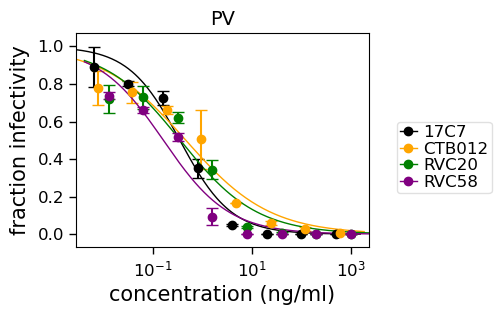

In [9]:
fig, axes = fits.plotViruses(xlabel='concentration (ng/ml)',
                            serum_to_color_marker={"17C7": ("black", "o"), "CTB012": ("orange", "o"),
                                                   "RVC20": ("green", "o"), "RVC58": ("purple", "o")})

#suppress file-writing
#fig.savefig('231027_NeutCurves.svg')

In [10]:
fits_fixtop = neutcurve.CurveFits(data)

In [11]:
fits_fixtop.fitParams(ics=(50,90))

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic90,ic90_bound,ic90_str,midpoint,midpoint_bound,midpoint_bound_type,slope,top,bottom,r2,rmsd
0,17C7,PV,average,2,0.351,interpolated,0.351,4.84,interpolated,4.84,0.351,0.351,interpolated,0.838,1,0,0.979,0.0537
1,CTB012,PV,average,2,0.466,interpolated,0.466,33.9,interpolated,33.9,0.466,0.466,interpolated,0.512,1,0,0.958,0.0654
2,RVC20,PV,average,2,0.359,interpolated,0.359,17.7,interpolated,17.7,0.359,0.359,interpolated,0.564,1,0,0.936,0.0802
3,RVC58,PV,average,2,0.163,interpolated,0.163,4.59,interpolated,4.59,0.163,0.163,interpolated,0.659,1,0,0.946,0.0711


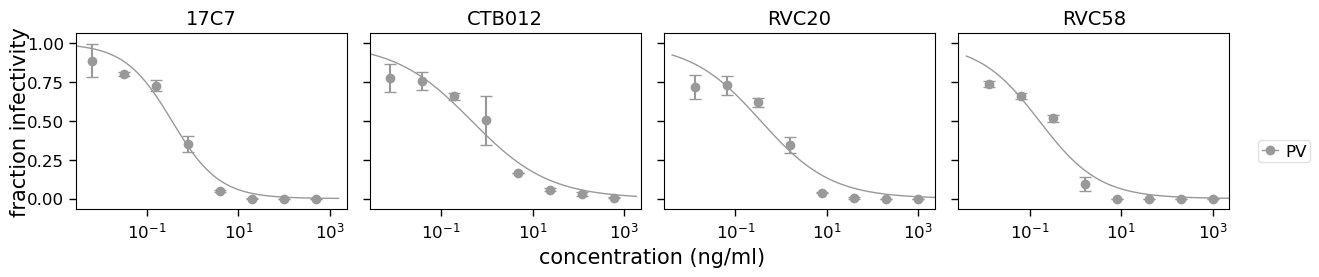

In [12]:
fig, axes = fits_fixtop.plotSera(xlabel='concentration (ng/ml)')